# Online Retail Exploratory Data Analysis with Python

## Overview

In this project, I will utilize my skills as an entry-level data analyst working at an online retail company, by helping interpret real-world data to help make a key business decision.

## Case Study
In this project, I will working on a transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. The task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, I will identify patterns, outliers, and correlations in the data, to aid make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, I will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset used for this project is the "Online Retail" dataset. It contains transactional data of a UK-based online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file can be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# set plotting style
plt.style.use("seaborn-v0_8")

In [2]:
# Read data into pandas dataframe
data = pd.read_excel("Online Retail.xlsx")

print("Data read into pandas")

Data read into pandas


## Data Inspection and Cleaning

In [3]:
# Display first five rows
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Check null values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Check for duplicated rows
print(f"Number of duplicated rows: {data.duplicated().sum()}")

Number of duplicated rows: 5268


In [7]:
# Drop duplicated rows
data.drop_duplicates(inplace=True)

# confirm if duplicated rows is dropped by checking the shape of dataset
data.shape

(536641, 8)

In [8]:
# Basic Statistics of the dataset
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,536641.000000,536641,536641.000000,401604.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,15281.160818
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,13939.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,15145.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,219.130156,NaN,97.233118,1714.006089


In [9]:
data.describe(include="object")

,InvoiceNo,StockCode,Description,Country
count,536641,536641,535187,536641
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2301,2357,490300


In [10]:
# Description Value Counts excluding the null values
description_map = (
    data.dropna(subset=['Description'])
    .groupby('StockCode')['Description']
    .agg(lambda x: x.value_counts().index[0])
)


# Match stockcode 
mask = data['Description'].isna()
data.loc[mask, 'Description'] = data.loc[mask, 'StockCode'].map(description_map)

# Fill any null values
data["Description"] = data["Description"].fillna("Unknown")

## Exploratory Data Analysis

Exploring the data to understand the distributions of key variables, identify outliers, and uncover initial patterns and relationships. This includes analyzing sales trends over time, identifying top-selling products, and examining customer purchase behavior.

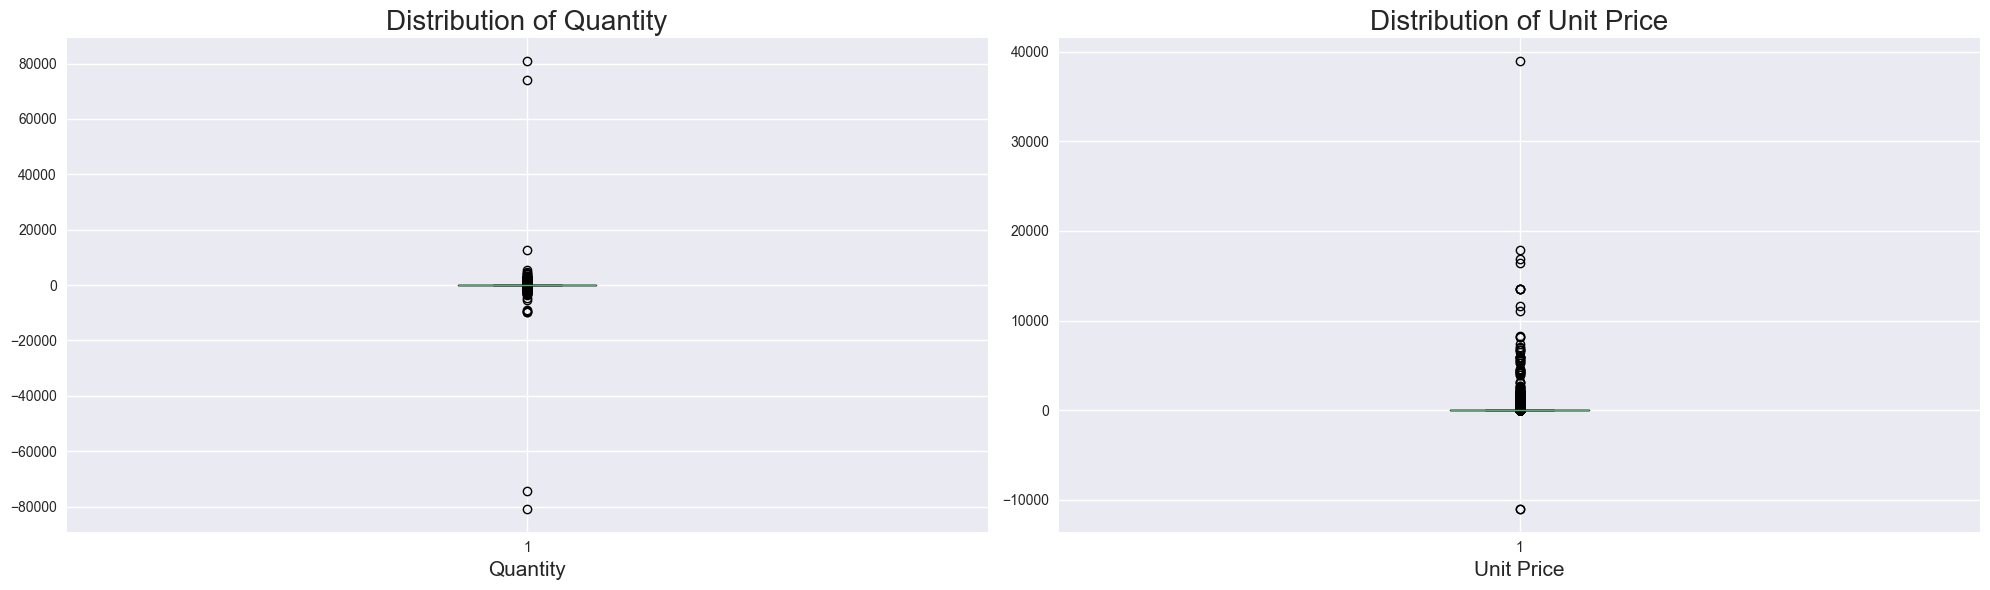

In [11]:
# Check Quantity and UnitPrice Distribution
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].boxplot(x=data["Quantity"])
axs[0].set_title("Distribution of Quantity", size=20)
axs[0].set_xlabel("Quantity", size=15)

axs[1].boxplot(x=data["UnitPrice"])
axs[1].set_title("Distribution of Unit Price", size=20)
axs[1].set_xlabel("Unit Price", size=15)

plt.tight_layout()
plt.show()

### Quantity and Unit Price has negative values. 

In [12]:
# Drop rows that has negative vakues for Quantity and UnitPrice Columns
mask = data[(data["Quantity"] < 0) | (data["UnitPrice"] < 0)]

data.drop(mask.index, inplace=True)
data.reset_index(drop=True, inplace=True)

In [13]:
# Number of unique country 
print(f"Number of Unique Cuntry: {data["Country"].nunique()}")

Number of Unique Cuntry: 38


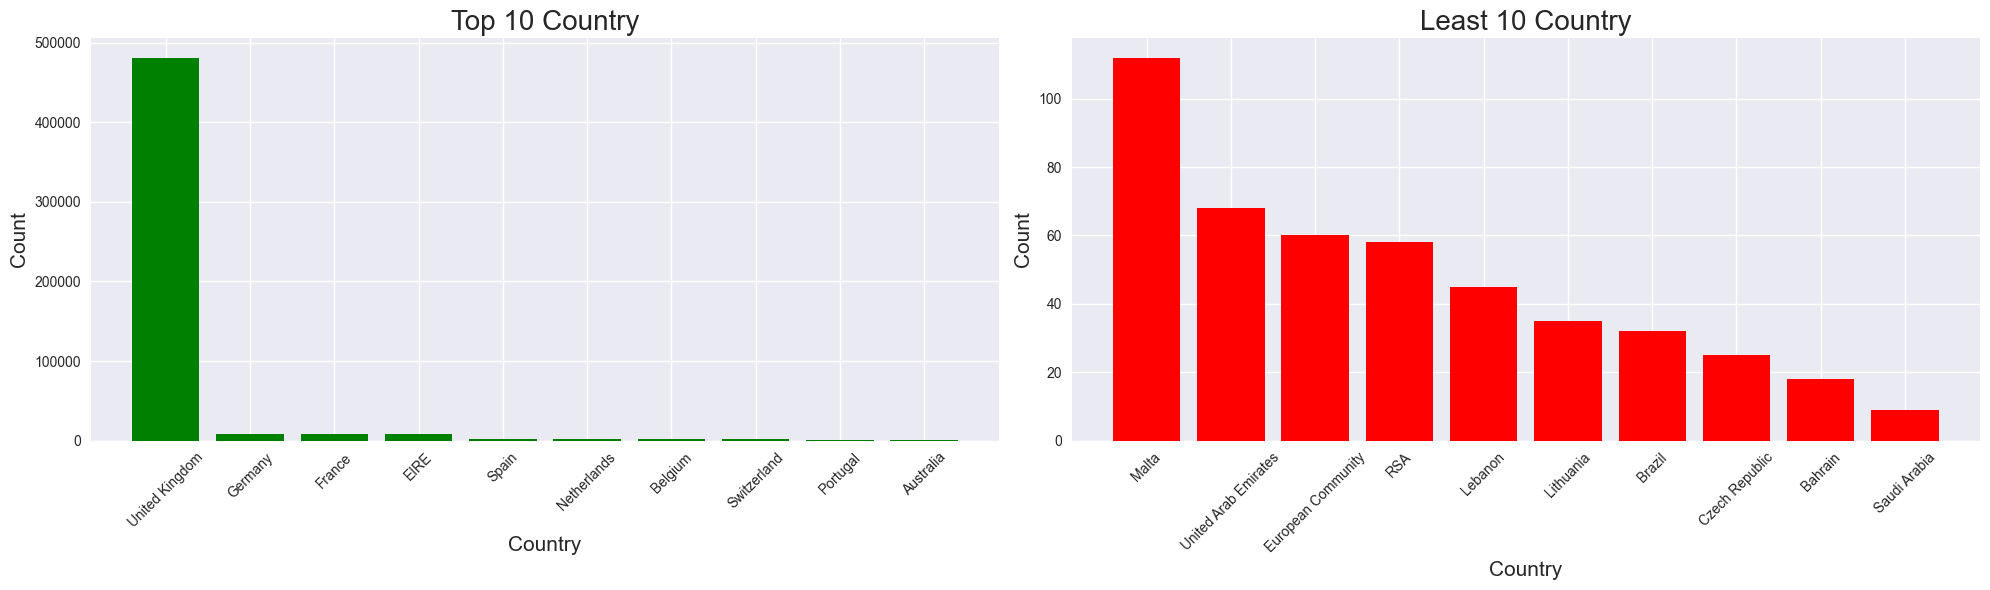

In [14]:
country_count = data["Country"].value_counts().sort_values(ascending=False)

# Top 10 Country and least 10
top = country_count.head(10)
low = country_count.tail(10)

# Visualize
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Top Country
axs[0].bar(x=top.index, height=top.values, color="green")
axs[0].set_title("Top 10 Country", size=20)
axs[0].set_xlabel("Country", size=15)
axs[0].tick_params(axis="x", rotation=45)
axs[0].set_ylabel("Count", size=15)

# Least Country
axs[1].bar(x=low.index, height=low.values, color="red")
axs[1].set_title("Least 10 Country", size=20)
axs[1].set_xlabel("Country", size=15)
axs[1].tick_params(axis="x", rotation=45)
axs[1].set_ylabel("Count", size=15)

plt.tight_layout()
plt.show()

## Sales Trends

In [15]:
# Create a copy of the dataset 
sales_df = data.copy()
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
# New columns that will aid in sales trend analysis

sales_df['Year'] = sales_df['InvoiceDate'].dt.year    # Extract year
sales_df['Month'] = sales_df['InvoiceDate'].dt.month  # Extract Month
sales_df['DayOfWeek'] = sales_df['InvoiceDate'].dt.dayofweek  # Extract Day of the week

# Total Price Column
sales_df["TotalPrice"] = sales_df["Quantity"] * sales_df["UnitPrice"]  

# Drop Uneccessary columns
sales_df.drop(["InvoiceNo", "CustomerID"], axis=1, inplace=True)

In [17]:
sales_df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Year,Month,DayOfWeek,TotalPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010,12,2,15.30
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,2,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010,12,2,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,2,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,2,20.34


In [18]:
sales_df.isnull().sum()

StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
Year           0
Month          0
DayOfWeek      0
TotalPrice     0
dtype: int64

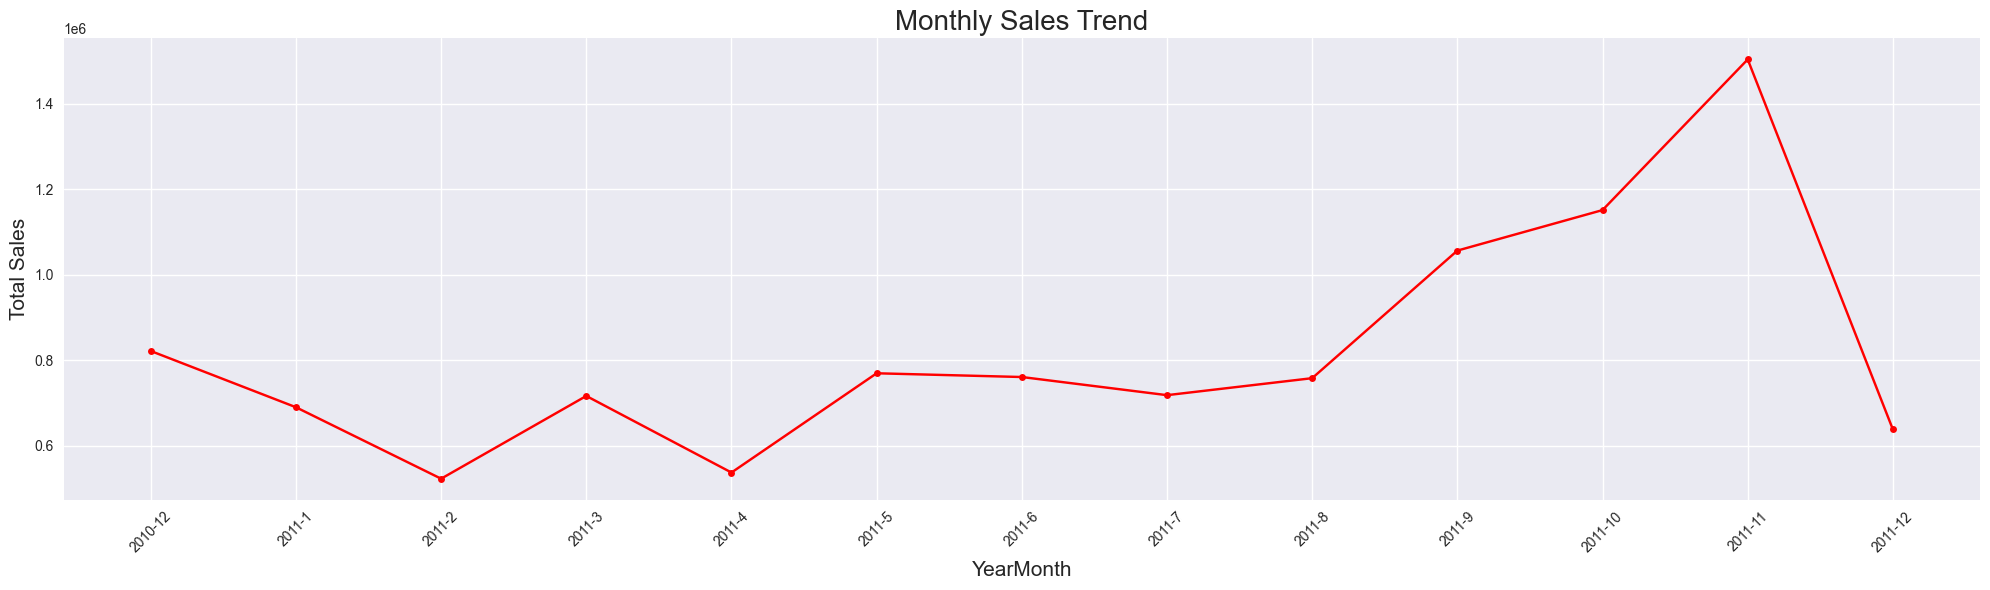

In [19]:
# Sales trend over time
monthly_sales = sales_df.groupby(["Year", "Month"])["TotalPrice"].sum().reset_index()
monthly_sales["YearMonth"] = monthly_sales["Year"].astype("str") + "-" + monthly_sales["Month"].astype("str")

# Visualize the trend
plt.figure(figsize=(20, 6))
plt.plot("YearMonth", "TotalPrice", data=monthly_sales, marker="o", markersize=5, color="red")
plt.title("Monthly Sales Trend", size= 20)
plt.xlabel("YearMonth", size=15)
plt.xticks(rotation=45)
plt.ylabel("Total Sales", size=15)
plt.tight_layout()

plt.show()

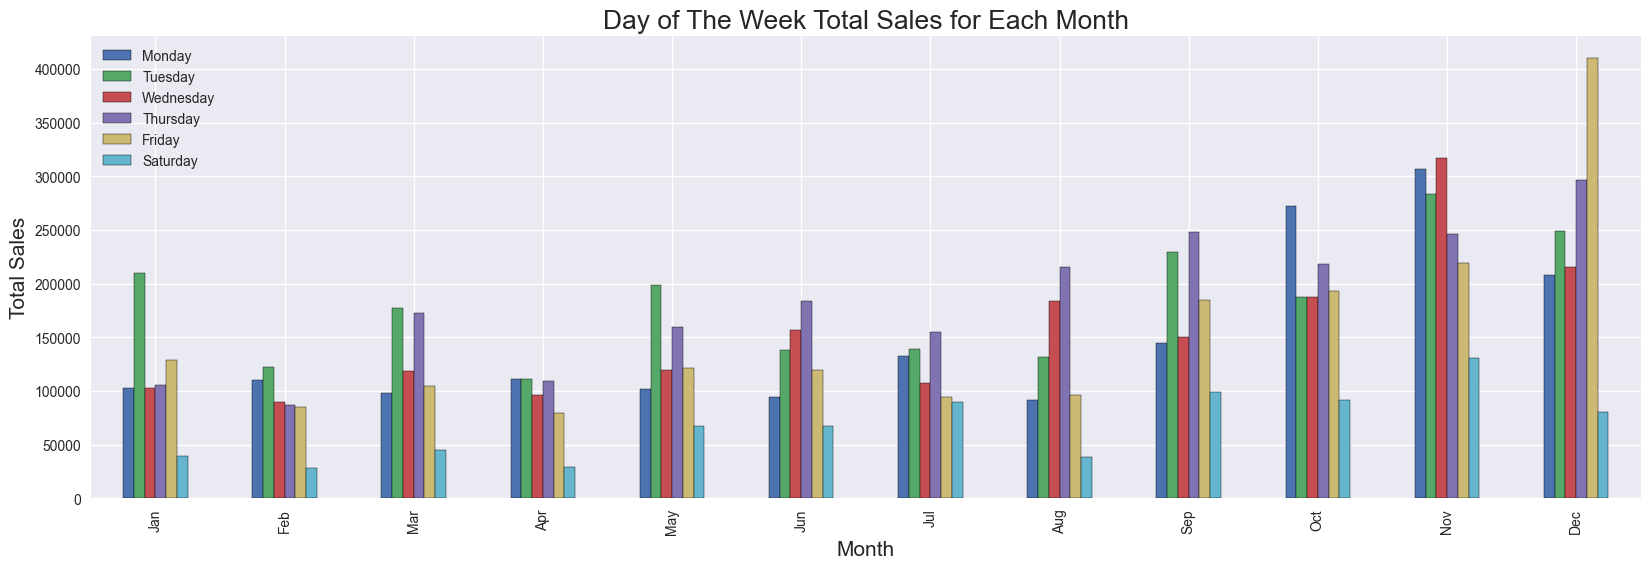

In [20]:
dow_sales = sales_df.groupby(["Month", "DayOfWeek"])["TotalPrice"].sum()

# Unstack the series
dow_df = pd.DataFrame(dow_sales.unstack(level=1))

dow_df.columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

dow_df.index = [month_names[m - 1] for m in dow_df.index]


# Visualize
dow_df.plot(kind="bar", figsize=(20, 6), edgecolor="black")
plt.title("Day of The Week Total Sales for Each Month", size=19)
plt.xlabel("Month", size=15)
plt.ylabel("Total Sales", size=15)
plt.legend(loc="upper left", labels=dow_df.columns)

plt.show()

,Country,TotalPrice
36,United Kingdom,9001744.094
24,Netherlands,285446.340
10,EIRE,283140.520
14,Germany,228678.400
13,France,209625.370


,Country,TotalPrice
29,Saudi Arabia,145.92
2,Bahrain,754.14
8,Czech Republic,826.74
28,RSA,1002.31
4,Brazil,1143.60


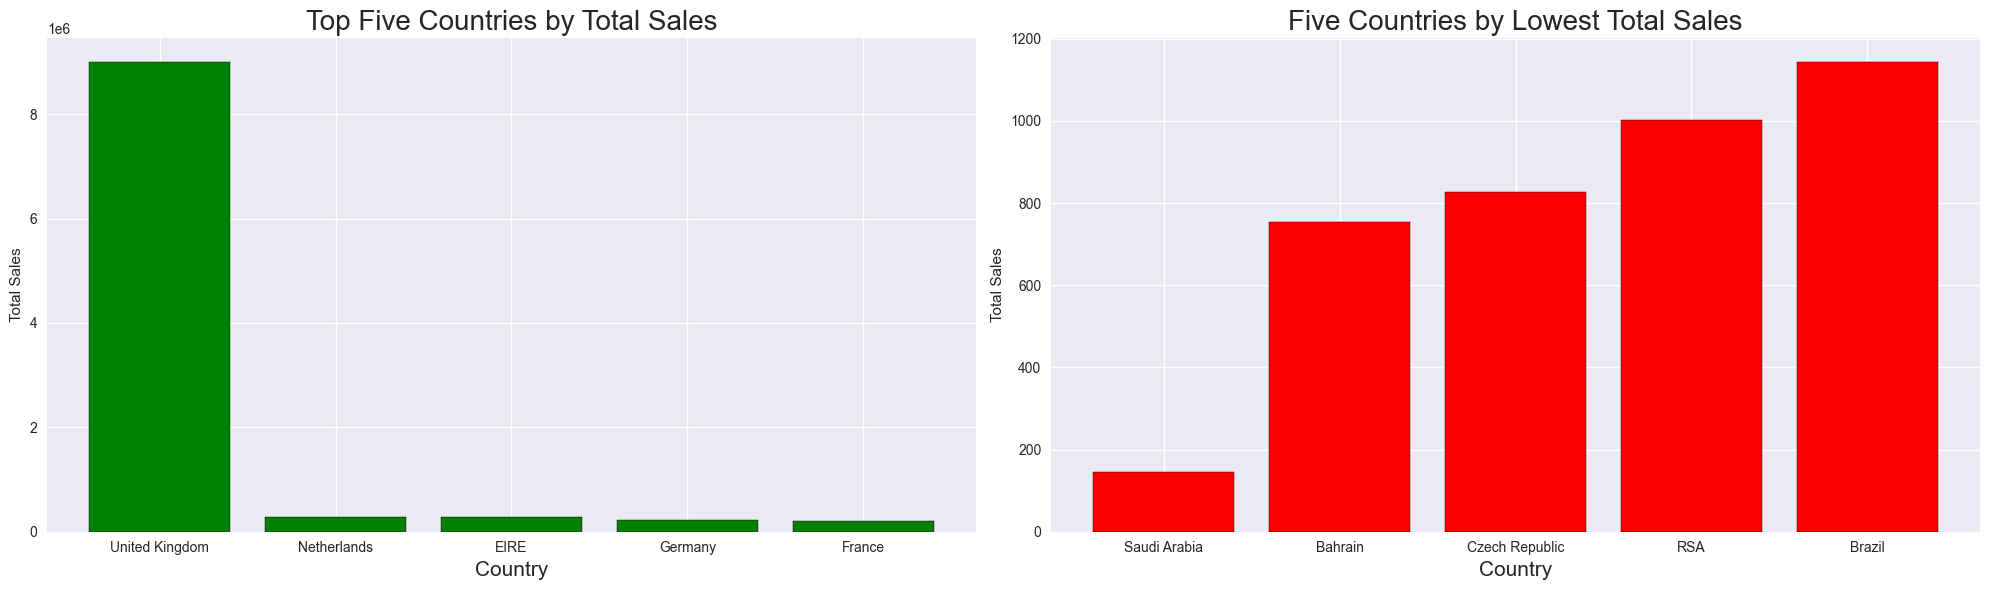

In [21]:
# Sales by Country
country_sales = sales_df.groupby("Country")["TotalPrice"].sum().reset_index()

# Top Five Country
top_country_sales = country_sales.sort_values(by="TotalPrice", ascending=False).head()
display(top_country_sales)

# Least Five Country
least_country_sales = country_sales.sort_values(by="TotalPrice").head()
display(least_country_sales)

# Visualize
figure, axes = plt.subplots(1, 2, figsize=(20, 6))

axes[0].bar(top_country_sales.Country, height=top_country_sales.TotalPrice, color="green", edgecolor="black")
axes[0].set_title("Top Five Countries by Total Sales", size=20)
axes[0].set_xlabel("Country", size=15)
axes[0].set_ylabel("Total Sales")

axes[1].bar(least_country_sales.Country, height=least_country_sales.TotalPrice, color="red", edgecolor="black")
axes[1].set_title("Five Countries by Lowest Total Sales", size=20)
axes[1].set_xlabel("Country", size=15)
axes[1].set_ylabel("Total Sales")

plt.tight_layout()
plt.show()

## Product Analysis

In [22]:
product_df = sales_df.copy()
product_df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Year,Month,DayOfWeek,TotalPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010,12,2,15.30
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,2,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010,12,2,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,2,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,2,20.34


In [23]:
product_df.isnull().sum()

StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
Year           0
Month          0
DayOfWeek      0
TotalPrice     0
dtype: int64

Top 10 Best-Selling Products by Quantity:


,Description,TotalQuantity,TotalRevenue
2401,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
2065,MEDIUM CERAMIC TOP STORAGE JAR,78033,81700.92
3951,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951,13814.01
1827,JUMBO BAG RED RETROSPOT,48375,94159.81
3861,WHITE HANGING HEART T-LIGHT HOLDER,37876,106236.72
2695,POPCORN HOLDER,36749,34288.67
2351,PACK OF 72 RETROSPOT CAKE CASES,36396,21246.45
229,ASSORTED COLOUR BIRD ORNAMENT,36362,58927.62
2755,RABBIT NIGHT LIGHT,31555,66870.03
2120,MINI PAINT SET VINTAGE,26633,16937.82



Top 10 Products by Total Revenue:


,Description,TotalQuantity,TotalRevenue
1072,DOTCOM POSTAGE,1708,206248.77
2867,REGENCY CAKESTAND 3 TIER,13862,174156.54
2401,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
3861,WHITE HANGING HEART T-LIGHT HOLDER,37876,106236.72
2427,PARTY BUNTING,18287,99445.23
1827,JUMBO BAG RED RETROSPOT,48375,94159.81
2065,MEDIUM CERAMIC TOP STORAGE JAR,78033,81700.92
2706,POSTAGE,6500,78101.88
2205,Manual,6991,77752.82
2755,RABBIT NIGHT LIGHT,31555,66870.03


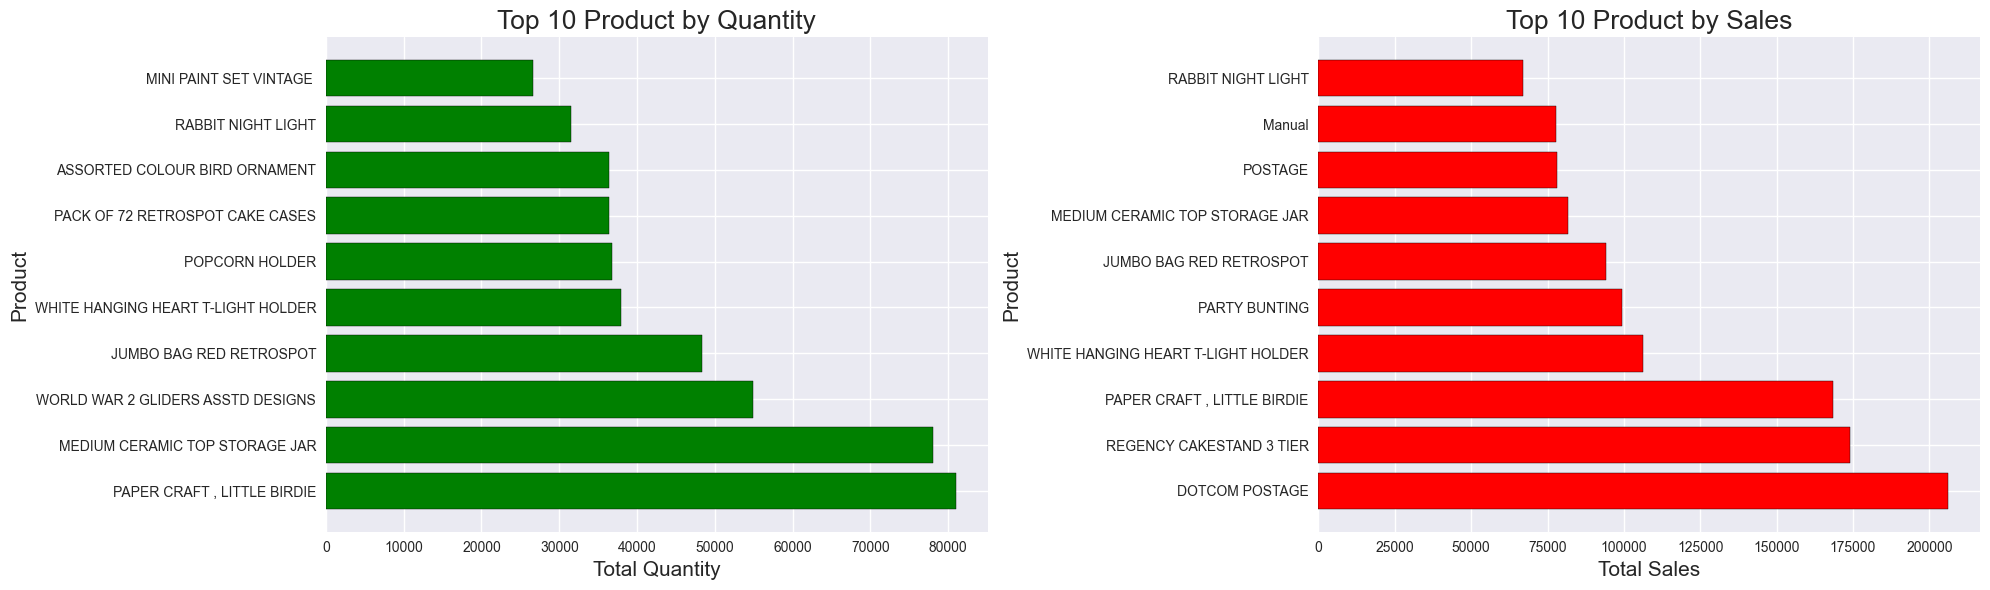

In [24]:
product_performance = product_df.groupby('Description').agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalRevenue=('TotalPrice', 'sum')
).reset_index()

top_10_quantity = product_performance.sort_values(by='TotalQuantity', ascending=False).head(10)
top_10_revenue = product_performance.sort_values(by='TotalRevenue', ascending=False).head(10)

print("Top 10 Best-Selling Products by Quantity:")
display(top_10_quantity)

print("\nTop 10 Products by Total Revenue:")
display(top_10_revenue)


# Visualization
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].barh(top_10_quantity.Description, width=top_10_quantity.TotalQuantity, color="green", edgecolor="black")
axs[0].set_title("Top 10 Product by Quantity", size=19)
axs[0].set_xlabel("Total Quantity", size=15)
axs[0].set_ylabel("Product", size=15)

axs[1].barh(top_10_revenue.Description, width=top_10_revenue.TotalRevenue, color="Red", edgecolor="black")
axs[1].set_title("Top 10 Product by Sales", size=19)
axs[1].set_xlabel("Total Sales", size=15)
axs[1].set_ylabel("Product", size=15)

plt.tight_layout()
plt.show()

# Customer Behaviour

In [25]:
customer_df = data.copy()
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [26]:
customer_df.shape

(526052, 8)

In [27]:
customer_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133320
Country             0
dtype: int64

In [28]:
# Drop rows with null values in the CustomerID column
customer_df.dropna(subset="CustomerID", axis=0, ignore_index=True, inplace=True)

In [29]:
customer_df.shape

(392732, 8)

In [30]:
customer_df["TotalPrice"] = customer_df["Quantity"] * customer_df["UnitPrice"]

In [31]:
# Group by CustomerID and agg by their number of unique invoice and Total price
customer_activity = customer_df.groupby("CustomerID").agg(
    TotalInvoice=("InvoiceNo", "nunique"),
    TotalRevenue=("TotalPrice", "sum")
).reset_index()

customer_activity.head()

,CustomerID,TotalInvoice,TotalRevenue
0,12346.0,1,77183.60
1,12347.0,7,4310.00
2,12348.0,4,1797.24
3,12349.0,1,1757.55
4,12350.0,1,334.40


## Customer Segmentation

Segment customers based on their purchasing behavior to identify valuable customer groups. This could involve techniques like RFM (Recency, Frequency, Monetary) analysis.

Calculate Recency, Frequency, and Monetary values for each customer and combine them into a single DataFrame. The snapshot date is one day after the last transaction date in the dataset.

In [32]:
# snapshot date
snapshot_date = customer_df["InvoiceDate"].max() + pd.Timedelta(days=1)


customer_rfm = customer_df.groupby("CustomerID").agg(
    Recency = ("InvoiceDate", lambda x: (snapshot_date - x.max()).days),
    Frequency = ("InvoiceNo", "nunique"),
    Monetary = ("TotalPrice", "sum")
).reset_index()

customer_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


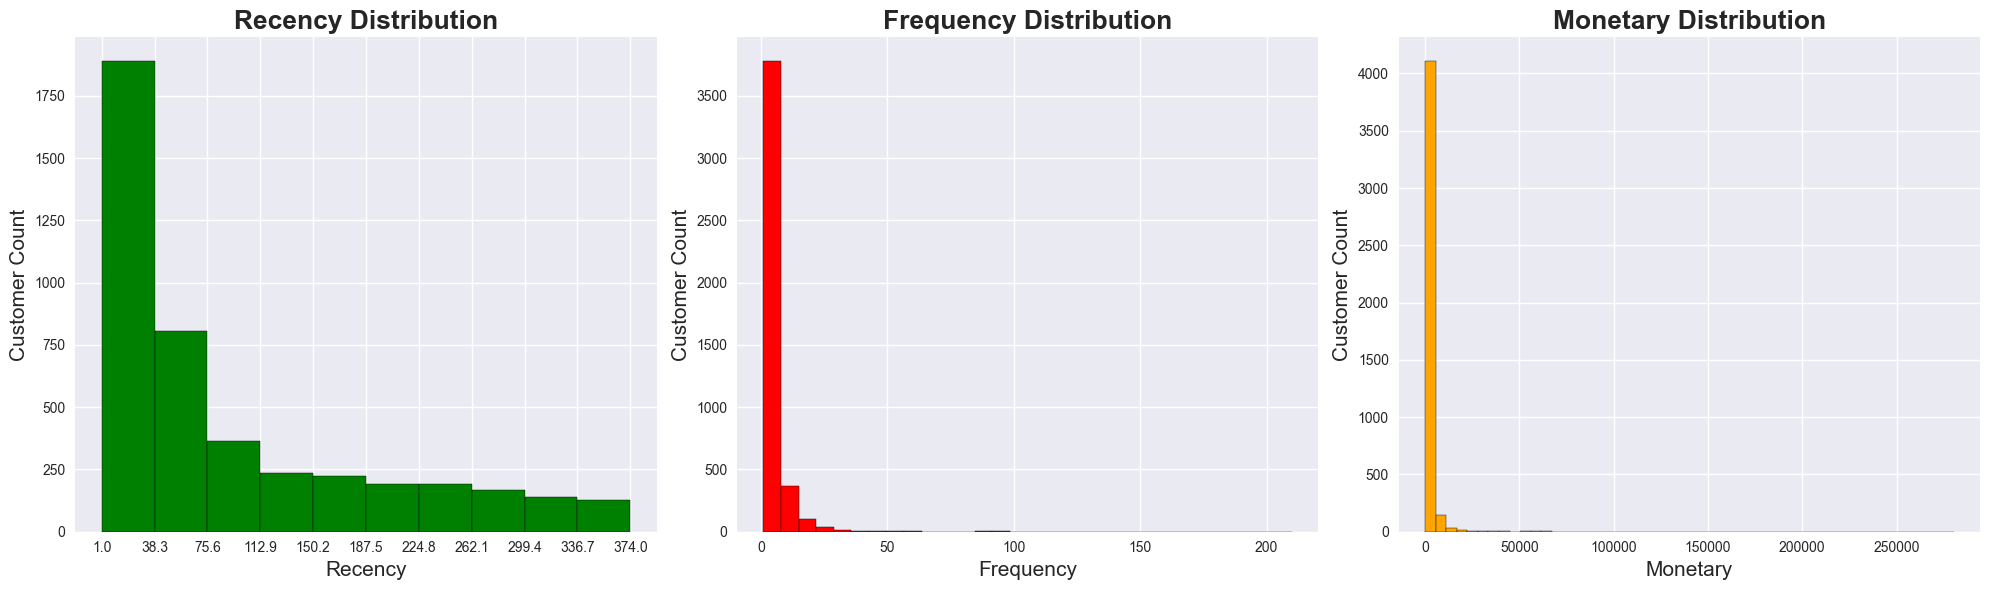

In [33]:
# check the distributions of Recency, Frequency, and Monetary
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].hist(customer_rfm["Recency"], bins=10, color="green", edgecolor="black")
ax[0].set_title("Recency Distribution", size=19, weight="bold")
ax[0].set_xlabel("Recency", size=15)
ax[0].set_ylabel("Customer Count", size=15)
recency_bins = np.histogram_bin_edges(customer_rfm["Recency"], bins=10)
ax[0].set_xticks(np.round(recency_bins, 1))

ax[1].hist(customer_rfm["Frequency"], bins=30, color="red", edgecolor="black")
ax[1].set_title("Frequency Distribution", size=19, weight="bold")
ax[1].set_xlabel("Frequency", size=15)
ax[1].set_ylabel("Customer Count", size=15)

ax[2].hist(customer_rfm["Monetary"], bins=50, color="orange", edgecolor="black")
ax[2].set_title("Monetary Distribution", size=19, weight="bold")
ax[2].set_xlabel("Monetary", size=15)
ax[2].set_ylabel("Customer Count", size=15)

plt.tight_layout()
plt.show()

K-Means Clustering algorithm to segment customers base on the RFM data

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(customer_rfm[['Recency', 'Frequency', 'Monetary']])

# Apply K-Means clustering with 4 as desired number of clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

customer_rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,0
1,12347.0,2,7,4310.00,3
2,12348.0,75,4,1797.24,3
3,12349.0,19,1,1757.55,3
4,12350.0,310,1,334.40,1


In [35]:
cluster_profile = customer_rfm.groupby('Cluster', as_index=False).agg(
    {
        "Recency": "mean",
        "Frequency": "mean",
        "Monetary": "mean",
        "CustomerID": "count"
    }
).round(2)

# Rename CustomerID column
cluster_profile.rename(columns={"CustomerID": "CustomerCount"}, inplace=True)

cluster_profile

,Cluster,Recency,Frequency,Monetary,CustomerCount
0,0,15.67,22.05,12435.09,211
1,1,248.56,1.55,476.33,1062
2,2,7.38,82.69,127187.96,13
3,3,43.91,3.66,1344.28,3053


### Interpretation of the above table
* Cluster 2: These are the best/top customers – they purchased very recently, very frequently, and spent a lot.
* Cluster 0: These are loyal customers – still active, decent frequency and spend.
* Cluster 1: These are likely churned customers – haven’t bought in a long time, bought infrequently, and spent very little.
* Cluster 3: These may be regular or low-value customers – moderate recency, low frequency and spend.

In [36]:
# dict for mapping
cluster_label = {
    2: "Top Customer",
    0: "Loyal Customer",
    1: "Churned Customer",
    3: "Regular Customer"
}

# map dict to cluster column
cluster_profile["CustomerGroup"] = cluster_profile["Cluster"].map(cluster_label)

cluster_profile

,Cluster,Recency,Frequency,Monetary,CustomerCount,CustomerGroup
0,0,15.67,22.05,12435.09,211,Loyal Customer
1,1,248.56,1.55,476.33,1062,Churned Customer
2,2,7.38,82.69,127187.96,13,Top Customer
3,3,43.91,3.66,1344.28,3053,Regular Customer


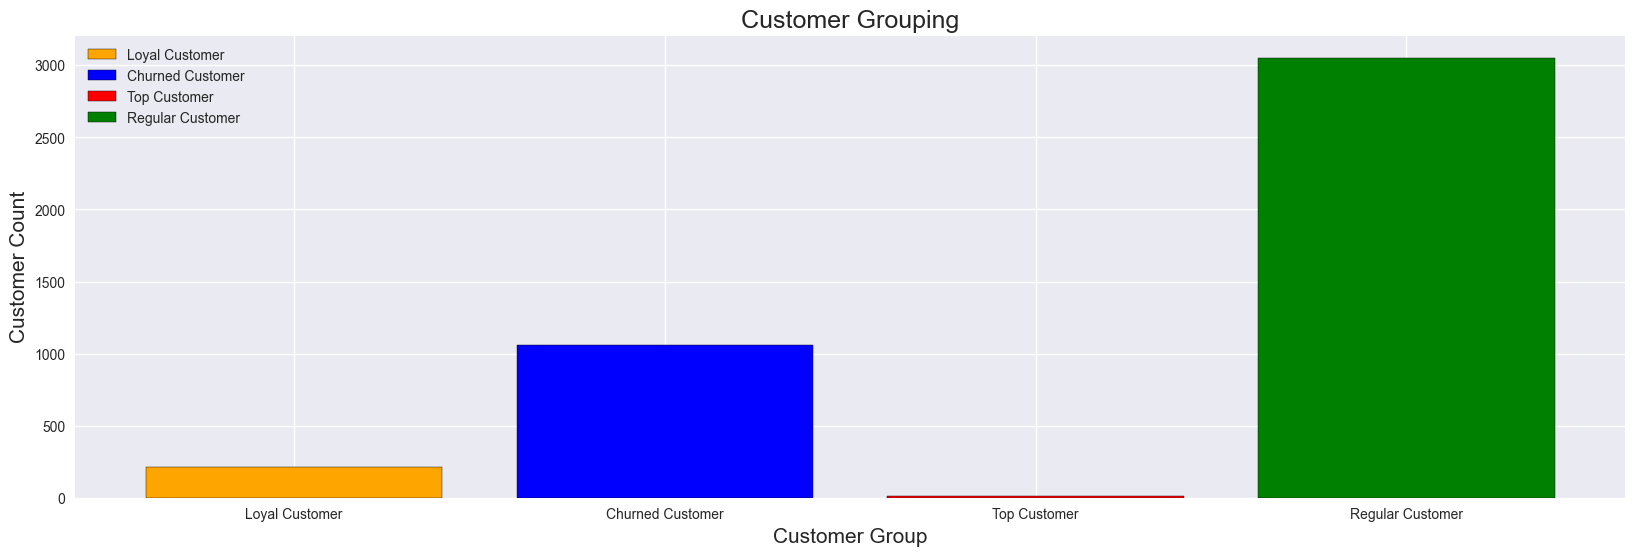

In [37]:
plt.figure(figsize=(20, 6))
plt.bar(x="CustomerGroup",
        height="CustomerCount",
        data=cluster_profile,
        edgecolor="black",
        label="CustomerGroup",
        color=["orange", "blue", "red", "green"])

plt.title("Customer Grouping", size=18)
plt.xlabel("Customer Group", size=15)
plt.ylabel("Customer Count", size=15)
plt.legend()

plt.show()